In [1]:
from transformers.utils import logging
logging.set_verbosity_error()

In [2]:
from transformers import pipeline
sam_pipe = pipeline("mask-generation", "Zigeng/SlimSAM-uniform-77")

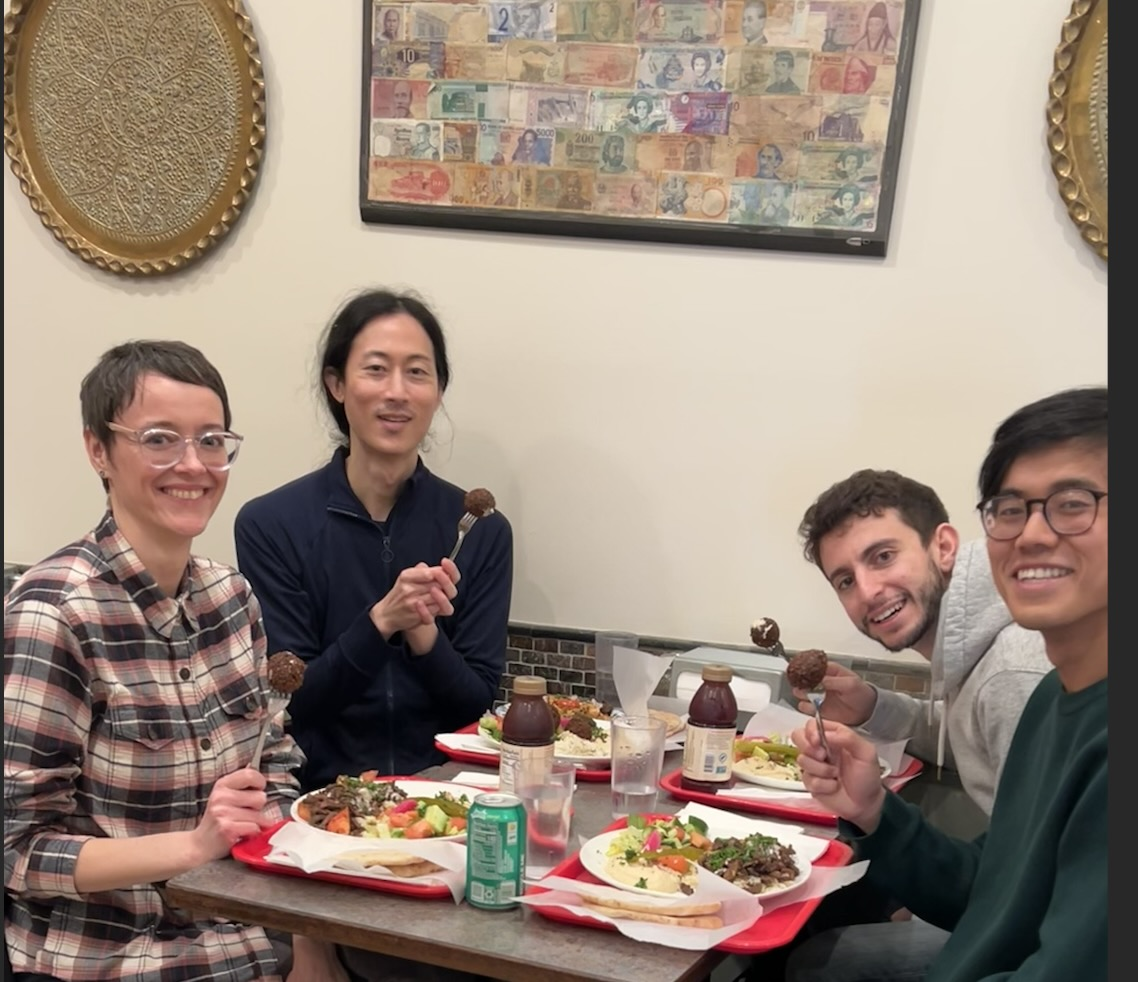

In [3]:
from PIL import Image
raw_image = Image.open("friends.jpg")
raw_image

In [4]:
output = sam_pipe(raw_image, point_per_batch=32)

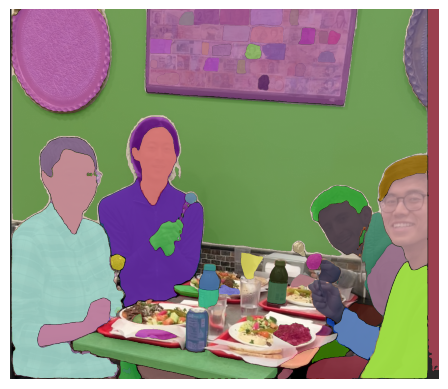

In [5]:
from helper import show_pipe_masks_on_image
image_output = show_pipe_masks_on_image(raw_image, output)

In [6]:
from transformers import SamModel, SamProcessor
model = SamModel.from_pretrained("Zigeng/SlimSAM-uniform-77")
processor = SamProcessor.from_pretrained("Zigeng/SlimSAM-uniform-77")

In [7]:
model

SamModel(
  (shared_image_embedding): SamPositionalEmbedding()
  (vision_encoder): SamVisionEncoder(
    (patch_embed): SamPatchEmbeddings(
      (projection): Conv2d(3, 168, kernel_size=(16, 16), stride=(16, 16))
    )
    (layers): ModuleList(
      (0-11): 12 x SamVisionLayer(
        (layer_norm1): LayerNorm((168,), eps=1e-06, elementwise_affine=True)
        (attn): SamVisionAttention(
          (qkv): Linear(in_features=168, out_features=504, bias=True)
          (proj): Linear(in_features=168, out_features=168, bias=True)
        )
        (layer_norm2): LayerNorm((168,), eps=1e-06, elementwise_affine=True)
        (mlp): SamMLPBlock(
          (lin1): Linear(in_features=168, out_features=696, bias=True)
          (lin2): Linear(in_features=696, out_features=168, bias=True)
          (act): GELUActivation()
        )
      )
    )
    (neck): SamVisionNeck(
      (conv1): Conv2d(168, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (layer_norm1): SamLayerNorm()
      (c

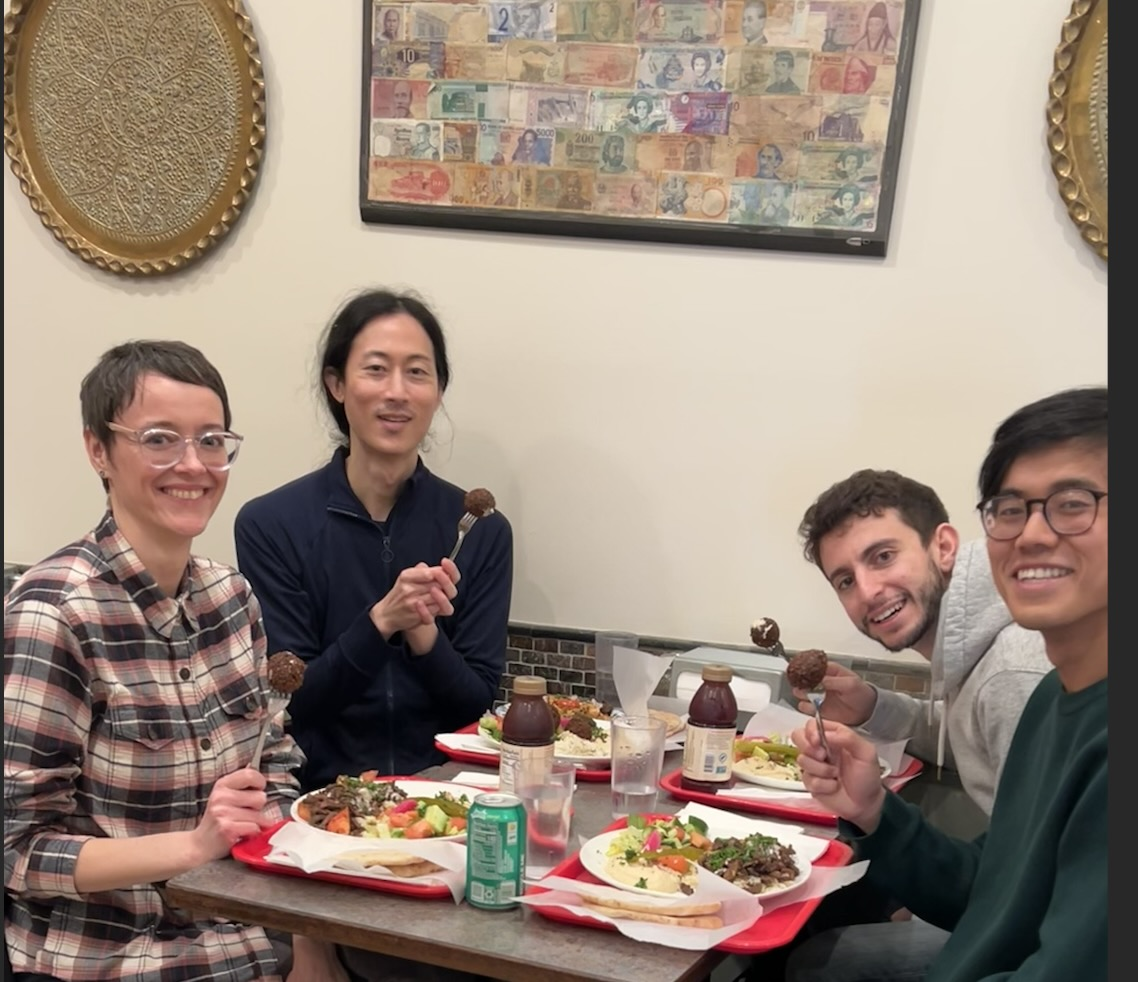

In [8]:
raw_image

In [9]:
input_points=[[[1600,700]]]

In [10]:
inputs = processor(raw_image,input_points=input_points,return_tentors="pt")

In [12]:
import torch
#with torch.no_grad():
   # outputs = model(**inputs)

_IncompleteInputError: incomplete input (2095676994.py, line 3)

In [13]:
# deptth
depth_estimator = pipeline("depth-estimation", model="Intel/dpt-hybrid-midas")

config.json:   0%|          | 0.00/9.88k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/490M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/382 [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs.hf.co/repos/f9/7a/f97a084580f8d8d1bc460df5d9ceb1a67a3193895a6ca774b961888997e17031/9599793d3ce64d7ebc85657360831596c1df9abc61f6820fe623fe7efb2e29c5?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model.safetensors%3B+filename%3D%22model.safetensors%22%3B&Expires=1743849864&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0Mzg0OTg2NH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy9mOS83YS9mOTdhMDg0NTgwZjhkOGQxYmM0NjBkZjVkOWNlYjFhNjdhMzE5Mzg5NWE2Y2E3NzRiOTYxODg4OTk3ZTE3MDMxLzk1OTk3OTNkM2NlNjRkN2ViYzg1NjU3MzYwODMxNTk2YzFkZjlhYmM2MWY2ODIwZmU2MjNmZTdlZmIyZTI5YzU%7EcmVzcG9uc2UtY29udGVudC1kaXNwb3NpdGlvbj0qIn1dfQ__&Signature=MQJzFf0zenPzqDH2vW9RscRnjIVVDenlFk7higdHOKsfuAcXHmRgXggQgNYN14zNOXT8IUFAgf0CAylXwOPm-2qKPbgQf2TL%7EhZqAOpP1DYoR4osfvCyVPridV1us66KW8cVmA5qTyTJDoWWs74hl8UsVQs9Kd89xUOuLiSg%7EEVwrl3V7ro%7E7sCePD0vTP%7EMV7JxAV0BCe8-QmKe63ad8qumAOfi-J239Piou4qTle64u9O6mHp7xIDvLgU78NQ2hLh

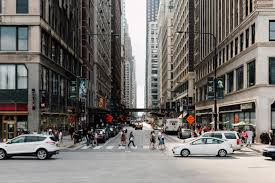

In [14]:
img = Image.open("street.jpg")
img

In [15]:
output = depth_estimator(img)

In [16]:
print(output)

{'predicted_depth': tensor([[ 686.1242,  695.2954,  702.5558,  ...,  770.7443,  775.6391,
          710.8231],
        [ 707.1542,  702.8823,  703.0480,  ...,  774.5963,  776.9966,
          776.2944],
        [ 702.1968,  704.2357,  705.0609,  ...,  776.1434,  777.6052,
          776.6001],
        ...,
        [2394.2046, 2397.4534, 2393.4641,  ..., 2523.8303, 2519.9553,
         2508.0691],
        [2412.0454, 2414.0583, 2409.0901,  ..., 2538.2563, 2538.6699,
         2534.7053],
        [2432.5859, 2429.5818, 2434.0940,  ..., 2571.5269, 2557.4158,
         2551.8926]]), 'depth': <PIL.Image.Image image mode=L size=275x183 at 0x19BF7188F70>}


In [21]:
output["predicted_depth"].unsqueeze(0).size()

torch.Size([1, 183, 275])

In [20]:
output["predicted_depth"].unsqueeze(1).shape

torch.Size([183, 1, 275])

In [22]:
img.size[::-1]

(183, 275)

In [23]:
prediction = torch.nn.functional.interpolate(
    output["predicted_depth"].unsqueeze(0).unsqueeze(0),
    size=img.size[::-1],
    mode="bicubic",
    align_corners=False
)

In [26]:
print(prediction.shape)

torch.Size([1, 1, 183, 275])


In [27]:
import numpy as np
output = prediction.squeeze().numpy()
formatted = (output*255 / np.max(output)).astype("uint8")
depth = Image.fromarray(formatted)

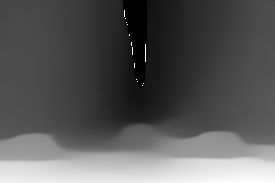

In [28]:
depth

In [29]:
import gradio as gr
def launch(input_image):
    out = depth_estimator(input_image)

    prediction = torch.nn.functional.interpolate(
        out["predicted_depth"].unsqueeze(0).unsqueeze(0),
        size=img.size[::-1],
        mode="bicubic",
        align_corners=False
    )
    output = prediction.squeeze().numpy()
    formatted = (output*255 / np.max(output)).astype("uint8")
    depth = Image.fromarray(formatted)
    return depth

iface = gr.Interface(launch, inputs=gr.Image(type="pil"), outputs=gr.Image(type="pil"))


In [30]:
iface.launch(share = True)

* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
